# **Exercise 3** More gates

<span style="color:red">**In preparation, not ready, yet!** </span>

In [1]:
# imports and utilities
from qiskit import QuantumCircuit
import math

## Exercise 3.1 - CNOT gate

1. Describe the behavior of the CNOT gate (aka CX gate).
2. Play around with the following quantum circuit. What is it doing?

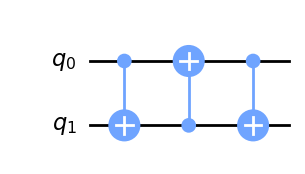

In [2]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
display(qc.draw(output="mpl"))

3. Let $X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$ and $Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$ be two of the Pauli (single-qubit) gates. 

    1. Together with the Hadamard gate $H$, show the identity $HXH=Z$. 
    2. Use this fact to assemble a Controlled-$Z$ gate ($CZ$) out of $H$ and $CNOT$ gates. $CZ$ works by the same principle as $CNOT$ does: It applies $Z$ to its target qubit whenever its control qubit is in state $\lvert 1\rangle$.

## Exercise 3.2 - Entanglement

Consider the $2$-qubit states $\lvert\psi\rangle=\frac{1}{\sqrt{2}}\lvert 00\rangle+\frac{1}{\sqrt{2}}\lvert 01\rangle$ and $\lvert\Phi^+\rangle=\frac{1}{\sqrt{2}}\lvert 00\rangle+\frac{1}{\sqrt{2}}\lvert 11\rangle$. Solve 1. and 2. (see below) for both states:

1. Find out whether the state is entangled or separable. Explain your reasoning.
2. Build a quantum circuit that creates the state by the end of computation.

## Exercise 3.3 - W state

The W state is the 3-qubit state $\lvert W\rangle=\frac{1}{\sqrt{3}}\lvert 001\rangle+\frac{1}{\sqrt{3}}\lvert 010\rangle+\frac{1}{\sqrt{3}}\lvert 100\rangle$.

1. Show that $\lvert W\rangle$ is entangled.
2. Explain the logics behind the following quantum circuit that creates $\lvert W\rangle$:

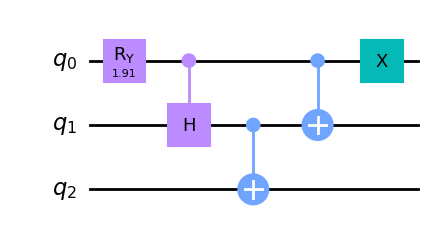

In [3]:
qc = QuantumCircuit(3)
qc.ry(2*math.acos(1/math.sqrt(3)), 0)
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)
qc.draw(output="mpl")

## Exercise 3.4 - A fully quantum dice simulator

Use Exercise 3.3 as inspiration to solve Exercise 2.4 again. This time we want to leave out the classical part and mimic rolling the dice completely by a quantum circuit.